### **Seaborn**
<a id="Introduction"></a>
If matplotlib tries to make easy things easy and hard things possible, Seaborn tries to make a well-defined set of hard things easy, too.


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Iris DataBase
iris = sns.load_dataset("iris")

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


One of the first things we want to do after loading a dataset is to see the distribution of the variables. Seaborn has a function called histplot() to help us do this. Let’s try it on the first variable of our dataset. Notice that we used the same command for showing the plot as we did with matplotlib. This is because the underlying structure in Seaborn is the same, and we can use the same functions that we saw before from pyplot. However, unlike in matplotlib, the resulting default plot is already a lot nicer.



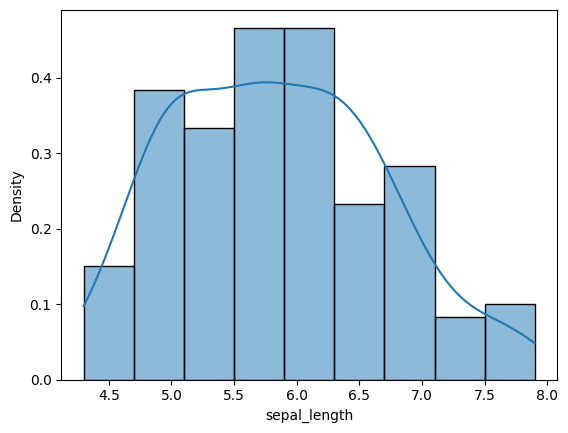

In [3]:
sns.histplot(iris["sepal_length"], kde=True, stat="density")
plt.show()

Another simple method from Seaborn is regplot(), used to obtain a scatter plot of two variables with an added regression line. All we have to do is pass the two variables that we want to plot. Try out the following:

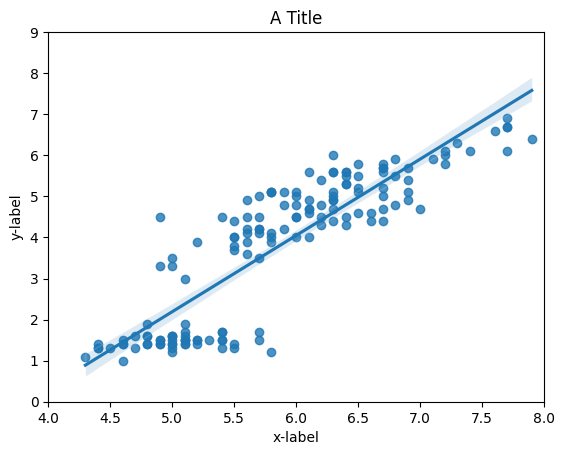

In [4]:
sns.regplot(x=iris.sepal_length, y=iris.petal_length)
plt.title("A Title") # Add plot title
plt.ylabel("y-label") # Adjust the label of the y-axis
plt.xlabel("x-label") # Adjust the label of the x-axis
plt.ylim(0, 9) # Adjust the limits of the y-axis
plt.xlim(4, 8) # Adjust the limits of the x-axis
# There are five possible arguments: 'white', 'dark', 'whitegrid', 'darkgrid', and 'ticks'
sns.set_style('ticks')
plt.show()

### **Pairplot**
Seaborn has a useful method called pairplot(). What this function does is that it takes each numerical variable of our DataFrame, and then creates a grid of scatter plots for each pairwise relationship. On the left side of the grid, we have the names of the y-variables for each row, and at the bottom of the grid, we have the names of the x-variables for each column. Let’s take a look it.



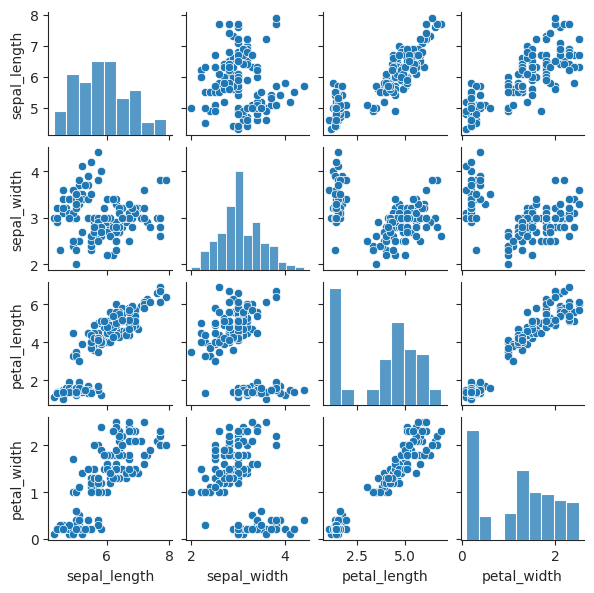

In [5]:
sns.pairplot(iris, height=1.5) #Height lets you change the size of the plots
plt.show()

Seaborn also provides an easy way to color-code the plots. Remember that in the previous unit we color-coded the dots in the scatter plot according to the type of species. To achieve this with Matplotlib, we divided our DataFrame into three separate DataFrames (one for each species) and then plotted them separately on the same plotting area using a different color for each one. Well, in Seaborn this can all be done much easier, by using the *hue* parameter. All we have to do is specify the name of the variable by which we want to color code the points. In our case, this is the variable ‘species’ so the command looks like this

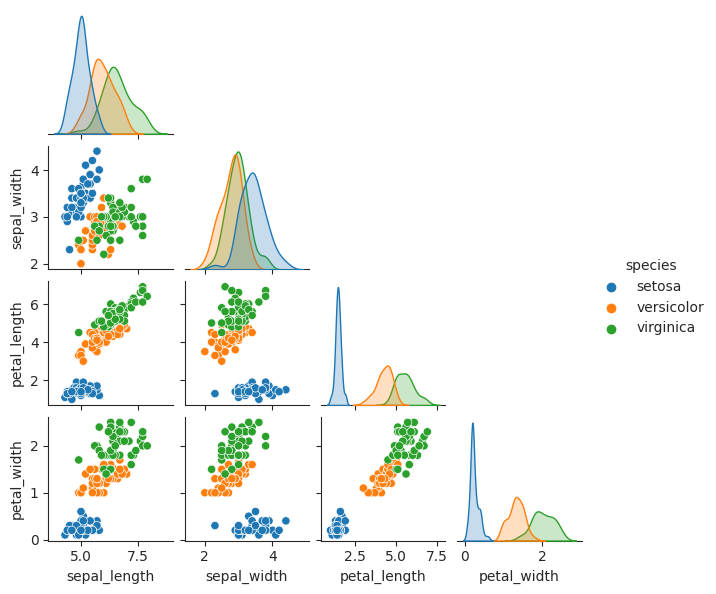

In [6]:
sns.pairplot(iris, hue="species", corner=True, height=1.5) # Only the lower triangle is shown
plt.show()

If we want to investigate further just two of the scatter plots.The two plots are drawn in one row and two columns, and share the same y-axis defined in y_vars. They may remind you the subplots from the previous unit. In fact, we can obtain the same scatter plots using Seaborn and the subplots method from the matplotlib.pyplot module. The structure is very similar to what we showed in the previous unit for subplots, with only one small difference. Seaborn library doesn’t work with the axes objects in the same way as the Matplotlib library does. For instance, we cannot have axes.sns.scatterplot(). Instead, we should specify the axes object as a parameter sns.scatterplot(ax=axes).



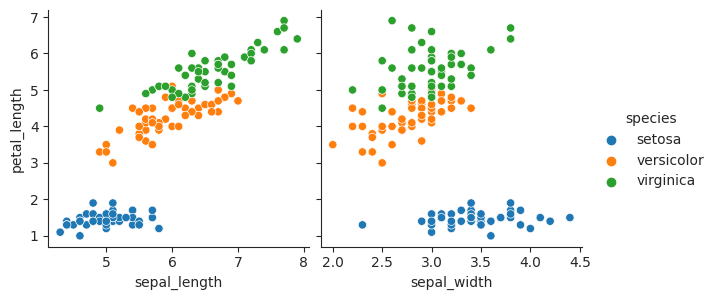

In [7]:
sns.pairplot(iris, x_vars=["sepal_length", "sepal_width"], 
                   y_vars=["petal_length"], 
                   hue="species", 
                   height=3)
plt.show()

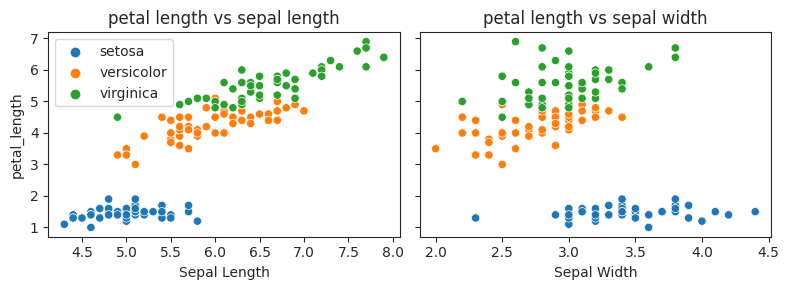

In [8]:
#COMBINING SEABORN WITH SUBPLOTS

fig, axes = plt.subplots(nrows = 1, # sets the number of rows in the subplot grid
                         ncols = 2, # sets the number of columns in the subplot grid
                         figsize = (8, 3), # sets the width and height of the figure (in inches)
                         sharey=True) # let the two plots share the same y-axis

# the left-hand side scatter plot
sns.scatterplot(data=iris, x="sepal_length", y="petal_length", hue='species', 
                ax=axes[0])   # draw the plot on the first axes


axes[0].set_title('petal length vs sepal length')
axes[0].legend(loc='upper left') # set the legend location
axes[0].set_xlabel('Sepal Length')

# the right-hand side scatter plot
sns.scatterplot(data=iris, x="sepal_width", y="petal_length", hue='species', 
                ax=axes[1],   # draw the plot on the second axes
                legend=False) # turn of the legend
    
axes[1].set_title('petal length vs sepal width')
axes[1].set_xlabel('Sepal Width')

fig.tight_layout()
plt.show()

The result is very similar to the one from Seaborn pairplot. The pairplot was just one line of code at the cost of having less control over the configuration of the plots. But, after combining the Seaborn scatter plots with the subplots method, we gained a lot more control over the plots. Another nice feature of Seaborn is that it has several color palettes that we can choose from, and it also allows us to easily create our own color palettes. We can specify the choice of palette inside the plotting command. Here is an example

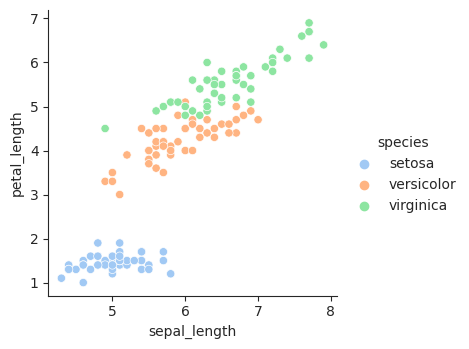

In [9]:
# define a custom palette
# my_palette = ["#95a5a6", "#e74c3c", "#34495e"]

sns.pairplot(
    iris,
    x_vars=["sepal_length"],
    y_vars=["petal_length"],
    height=3.5,
    hue="species",
    palette="pastel", #my_palette
)
plt.show()

### **FacetGrid**
In addition to pairplot(), perhaps the second most useful feature of Seaborn is the ability to build conditional plots. What exactly is a conditional plot? It’s a plot where the data is divided by one or more variables. It is usually used to obtain multiple plots side by side where each plot corresponds to a certain subset of the data.

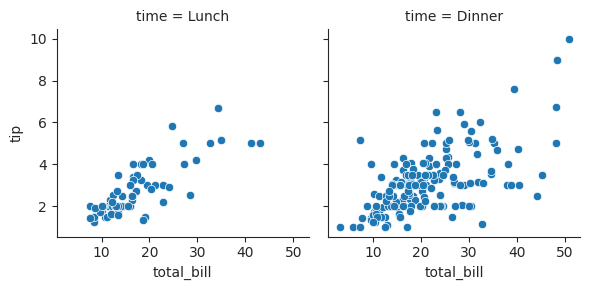

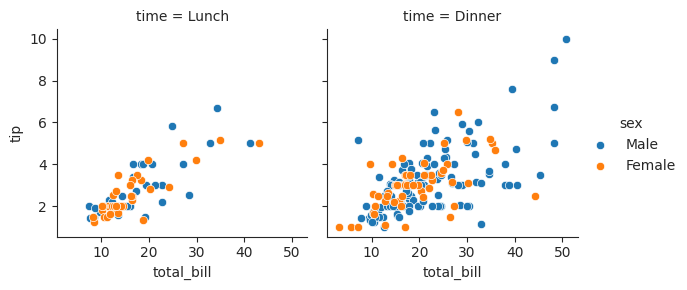

In [10]:
# The data is loaded
tips = sns.load_dataset("tips")
tips.head()
# We want to know if the relation between total bill and tips depends on the Dinner or Lunch
grid = sns.FacetGrid(tips, col="time")   # define the grid and the conditioning variable time into columns
grid = grid.map(sns.scatterplot, "total_bill", "tip") # define the scatter plot

# We can also color-code the plots as before through the hue parameter. Let’s use sex as the color-code variable.
grid = sns.FacetGrid(tips, col="time",   # define the conditioning variable
                           hue= 'sex')   # define the color-code variable
grid = grid.map(sns.scatterplot, "total_bill", "tip") # define the scatter plot

grid.add_legend()
plt.show()

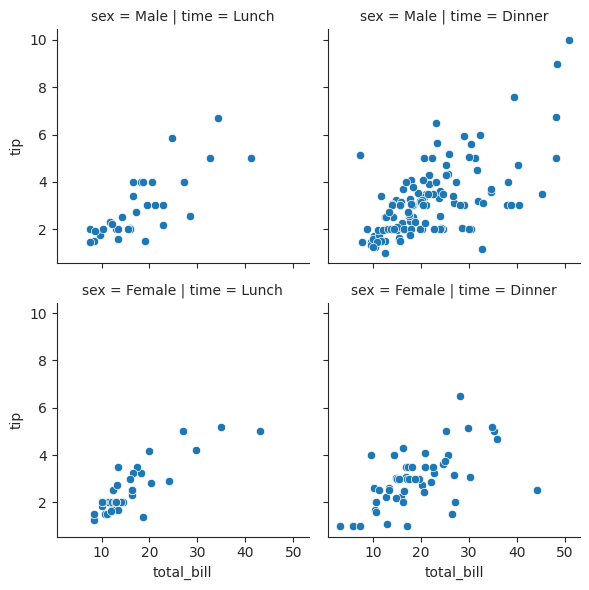

In [11]:
# It is also possible to define sex as the second condition.
grid = sns.FacetGrid(tips, col="time",   # define the 1st conditioning variable
                           row= 'sex')   # define the 2nd conditioning variable
grid = grid.map(sns.scatterplot, "total_bill", "tip") # define the scatter plot

How the plots will look like if we add smoker as the color-code variable?

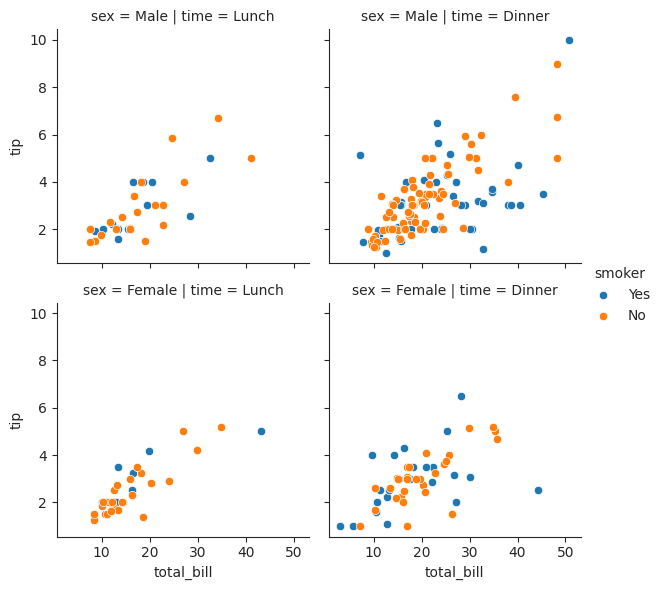

In [12]:
grid = sns.FacetGrid(tips, col="time",      # define the 1st conditioning variable
                           row= 'sex',      # define the 2nd conditioning variable
                           hue= 'smoker')   # define the color-code variable
grid = grid.map(sns.scatterplot, "total_bill", "tip") # define the scatter plot

grid.add_legend()
plt.show()

We just visualized five variables in one window: two numerical variables (total_bill, tip) and three categorical variables (time, sex, smoker).

In all of these cases, we are telling FacetGrid to draw a grid. The dimension of this grid depends on the conditioning variables set in col and row. The grid will be stored as grid. Check this out by just creating the grid.

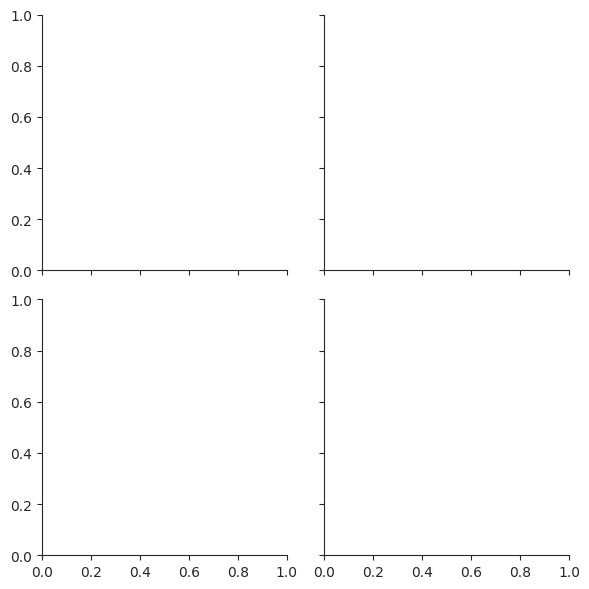

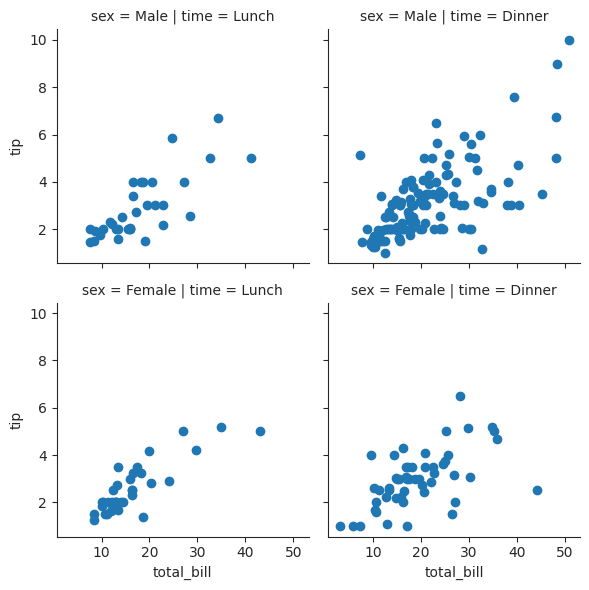

In [13]:
# Then, in the second command, we are applying the sns.scatterplot to each of the four subplots to create scatter plots
grid = sns.FacetGrid(tips, col="time", row= 'sex')
# An interesting feature of FacetGrid() is that it is not limited to Seaborn plots. You can use matplotlib functions such as plt.scatter() to each of the subplots
grid = sns.FacetGrid(tips, col="time", row= 'sex')
grid = grid.map(plt.scatter, "total_bill", "tip") # replace `sns.scatterplot` by `plt.scatter`

As you noted, FacetGrid can be very useful when we want to obtain scatter plots, or another kind of plot, to explore relationships between numerical variables, and when we also want to see how these change across a categorical variable.

#### Exercise for practising with seaborn:

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris = sns.load_dataset('iris')

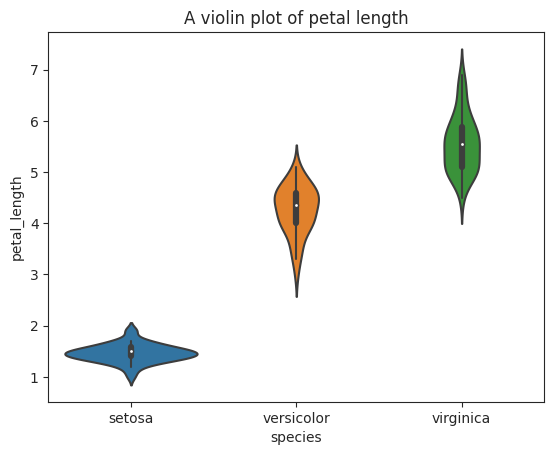

In [15]:
sns.violinplot(x=iris.species, y=iris.petal_length) # 1st arg is categories and secon numerical
plt.title('A violin plot of petal length')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

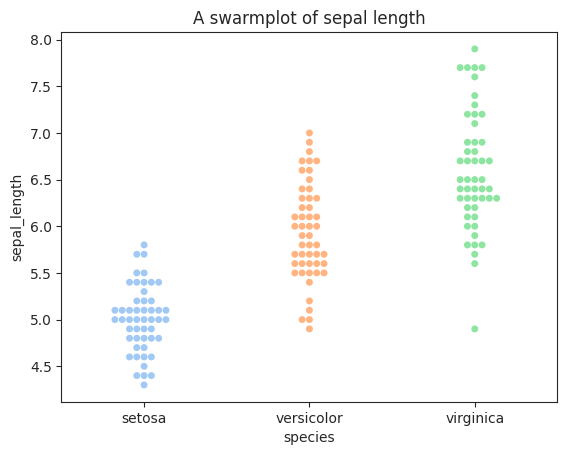

In [16]:
sns.swarmplot('species','sepal_length', data=iris, palette='pastel')
plt.title('A swarmplot of sepal length')
plt.show
# Es preferible utilizar la forma de arriba para introducir los parametros y asi evitar el warning.